# SciPy基础

## 8.1 SciPy概述

### 8.1.2 安装SciPy

In [16]:
import scipy
import numpy as np
import matplotlib as mpl

## 8.2 SciPy基础

### 8.2.2基础函数

### 8.2.3 特殊函数

In [17]:
from scipy import special
def drumhead_height(n, k, distance, angle, t):
    kth_zero = special.jn_zeros(n, k)[-1]
    return np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero)
theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]
x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])

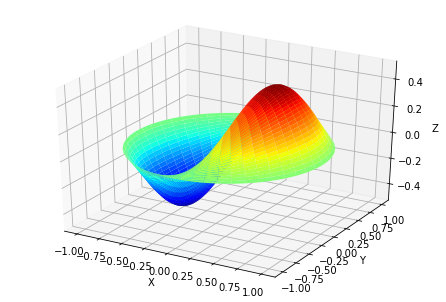

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## 8.3 积分

In [91]:
from scipy.integrate import quad
res,err = quad(np.sin, 0, np.pi/2)
res, err

(0.9999999999999999, 1.1102230246251564e-14)

In [24]:
np.allclose(err, 1 - res)

True

In [26]:
def calc_derivative(ypos, time, counter_arr):
    counter_arr += 1
    return -2 * ypos

In [27]:
counter = np.zeros((1,), dtype=np.uint16)

In [29]:
from scipy.integrate import odeint
time_vec = np.linspace(0, 4, 40)
yvec, info = odeint(calc_derivative, 1, time_vec,
                    args=(counter,), full_output=True)

In [30]:
counter

array([258], dtype=uint16)

In [31]:
info['nfe'][:10]

array([31, 35, 43, 49, 53, 57, 59, 63, 65, 69], dtype=int32)

In [32]:
mass = 0.5  # kg
kspring = 4  # N/m
cviscous = 0.4  # N s/m

In [33]:
eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
eps < 1


True

In [35]:
nu_coef = cviscous / mass
om_coef = kspring / mass

In [37]:
def calc_deri(yvec, time, nuc, omc):
    return (yvec[1], -nuc * yvec[1] - omc * yvec[0])

time_vec = np.linspace(0, 10, 100)
yarr = odeint(calc_deri, (1, 0), time_vec, args=(nu_coef, om_coef))

## 8.4 插值

In [39]:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

In [41]:
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)

In [43]:
computed_time = np.linspace(0, 1, 50)
linear_results = linear_interp(computed_time)

In [45]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(computed_time)

## 8.5 傅里叶变换

In [46]:
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + \
       0.5 * np.random.randn(time_vec.size)

In [47]:
from scipy import fftpack
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)

In [52]:
pidxs = np.where(sample_freq > 0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]

In [53]:
freq = freqs[power.argmax()]
np.allclose(freq, 1./period)

True

In [54]:
sig_fft[np.abs(sample_freq) > freq] = 0

In [55]:
main_sig = fftpack.ifft(sig_fft)

Text(0, 0.5, 'Amplitude')

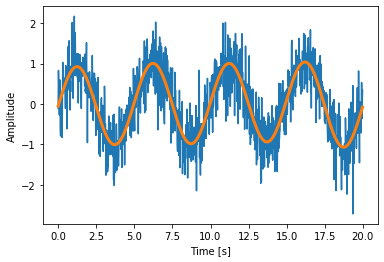

In [57]:
import pylab as plt
plt.figure()
plt.plot(time_vec, sig)
plt.plot(time_vec, main_sig, linewidth=3)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

## 8.6 线性代数

## 8.7 统计学

## 8.8 函数优化

In [58]:
from scipy import optimize

### 8.8.1 寻找标量函数的最小值

In [59]:
def f(x):
    return x**2 + 10*np.sin(x)

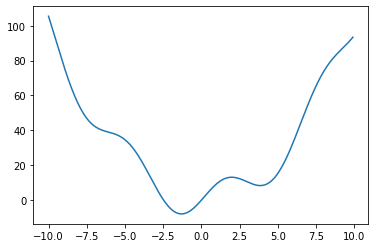

In [60]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))
plt.show()

In [61]:
optimize.fmin_bfgs(f, 0)

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


array([-1.30644012])

In [62]:
optimize.fmin_bfgs(f, 3, disp=0)

array([3.83746709])

In [63]:
grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid,))
xmin_global

array([-1.30641113])

In [65]:
xmin_local = optimize.fminbound(f, 0, 10)    
xmin_local

3.8374671194983834

### 8.8.2 寻找标量函数的根

In [70]:
root = optimize.fsolve(f, 1)  # 我们的最初猜想是1
root

array([0.])

In [71]:
root2 = optimize.fsolve(f, -2.5)
root2

array([-2.47948183])

### 8.8.3 曲线拟合

In [72]:
xdata = np.linspace(-10, 10, num=20)
ydata = f(xdata) + np.random.randn(xdata.size)

In [74]:
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

In [76]:
guess = [2, 2]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)
params

array([ 0.99707487, 10.1306459 ])

## 8.9 信号处理

In [80]:
from scipy import signal
import matplotlib.pyplot as plt

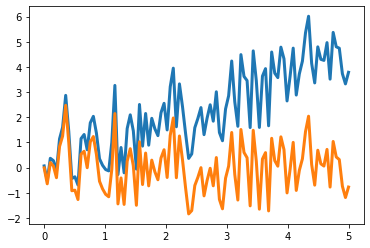

In [81]:
t = np.linspace(0, 5, 100)
x = t + np.random.normal(size=100)

plt.plot(t, x, linewidth=3)
plt.plot(t, signal.detrend(x), linewidth=3)

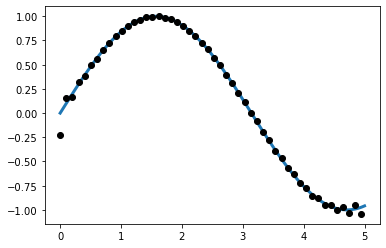

In [83]:
t = np.linspace(0, 5, 100)
x = np.sin(t)

plt.plot(t, x, linewidth=3)
plt.plot(t[::2], signal.resample(x, 50), 'ko')

## 8.10 图形处理

### 8.10.1 图像的几何变换 

In [85]:
from scipy import misc
import matplotlib.pyplot as pl
lena = misc.lena()
shifted_lena = ndimage.shift(lena, (50, 50))
shifted_lena2 = ndimage.shift(lena, (50, 50), mode='nearest')
rotated_lena = ndimage.rotate(lena, 30)
cropped_lena = lena[50:-50, 50:-50]
zoomed_lena = ndimage.zoom(lena, 2)
zoomed_lena.shape

AttributeError: module 'scipy.misc' has no attribute 'lena'

In [86]:
subplot(151)
pl.imshow(shifted_lena, cmap=cm.gray)
axis('off')

NameError: name 'subplot' is not defined

### 8.10.2 图像滤波器

In [87]:
el = ndimage.generate_binary_structure(2, 1)
el

NameError: name 'ndimage' is not defined

## 8.10 MATLAB文件读写